# Import Libraries

In [25]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.saving import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # For visualization

# Load Dataset

But since we dont have a dataset we would generate 1000 5x5 Image 



In [3]:
num_of_samples = 1000
images = np.random.randint(0,256, size=(num_of_samples, 5, 5, 1))
labels = np.random.randint(0,2, size=(num_of_samples, 1))




# Preprocess the Dataset

In [5]:
# Lets normalize the generated images to be either 0 or 1
def normalize_images(images):
    return images.astype('int') / 255.0

normal_images = normalize_images(images)

print(images[0])
print(normal_images[0])




[[[227]
  [ 53]
  [154]
  [248]
  [124]]

 [[ 86]
  [206]
  [125]
  [196]
  [145]]

 [[219]
  [ 85]
  [209]
  [151]
  [236]]

 [[223]
  [137]
  [ 49]
  [ 25]
  [100]]

 [[ 17]
  [134]
  [190]
  [192]
  [ 68]]]
[[[0.89019608]
  [0.20784314]
  [0.60392157]
  [0.97254902]
  [0.48627451]]

 [[0.3372549 ]
  [0.80784314]
  [0.49019608]
  [0.76862745]
  [0.56862745]]

 [[0.85882353]
  [0.33333333]
  [0.81960784]
  [0.59215686]
  [0.9254902 ]]

 [[0.8745098 ]
  [0.5372549 ]
  [0.19215686]
  [0.09803922]
  [0.39215686]]

 [[0.06666667]
  [0.5254902 ]
  [0.74509804]
  [0.75294118]
  [0.26666667]]]


# Data Splitting

Here we use 80/20 to split the datasets into training and test data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(normal_images, labels, test_size=0.2, random_state=42)
print("X-train shape:", X_train.shape)
print("X-test shape:", X_test.shape)
print("y-train shape:", y_train.shape)
print("y-test shape:", y_test.shape)


X-train shape: (800, 5, 5, 1)
X-test shape: (200, 5, 5, 1)
y-train shape: (800, 1)
y-test shape: (200, 1)


# Feature Calling(Kernel Setup)

In [7]:
# Define your custom 3x3 kernel
kernel = np.array([
    [[[0]], [[1]], [[2]]],  
    [[[2]], [[2]], [[0]]],
    [[[0]], [[1]], [[2]]]
])

print(kernel.shape)

(3, 3, 1, 1)


In [12]:
# Define the Model

model = Sequential()
model.add(Conv2D(filters=1, kernel_size=(3, 3), activation='relu', input_shape=(5,5,1), kernel_initializer=kernel, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 5, 5, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.54 KB)

 Trainable params: 395 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

Compiling configures the model for training

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model

Fit trains the model for a fixed number of epochs

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.4916 - loss: 0.7056 - val_accuracy: 0.5150 - val_loss: 0.7182
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5346 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6991
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5088 - loss: 0.6924 - val_accuracy: 0.5100 - val_loss: 0.7000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5028 - loss: 0.6963 - val_accuracy: 0.4800 - val_loss: 0.6980
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5189 - loss: 0.6927 - val_accuracy: 0.5150 - val_loss: 0.7146
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5366 - loss: 0.7036 - val_accuracy: 0.4950 - val_loss: 0.6978
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5411 - loss: 0.6906 - val_accuracy: 0.4800 - val_loss: 0.6981
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4874 - loss: 0.7000 - val_accuracy: 0.5150 - v

# Predict the given image in the question with our model

In [17]:
given_image = np.array([
                [3, 3, 2, 1, 0],
                [0, 0, 1, 3, 1],
                [3, 1, 2, 2, 3],
                [2, 0, 0, 2, 2],
                [2, 0, 0, 0, 1]
]).reshape(1, 5, 5, 1).astype('float32') / 255.0


prediction = model.predict(given_image)
print("Prediction for the given image:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Prediction for the given image: [[0.5056439]]


In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print(f"Test Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4375 - loss: 0.6965
Test Loss: 0.6969817280769348
Test Accuracy: 44.00%


# Visualize the Model

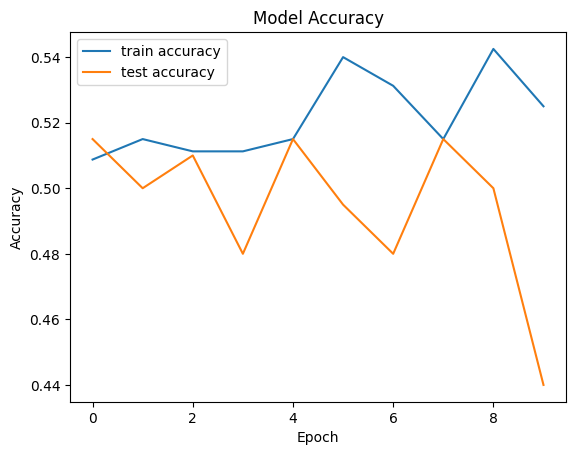

In [23]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Save the Model

Here we save the model to a h5 file that can be reused later

In [26]:
model.save('daniels_model.h5')
print("Model saved as daniels_model.h5")

Model saved as daniels_model.h5


# Load the  Saved Model

Here we load the saved model to a h5 file that can be reused later

In [ ]:
loaded_model = load_model('daniels_model.h5' )
print('Model saved successfull')